In [44]:
import pandas as pd

In [45]:
data=pd.read_csv("canada_per_capita_income.csv")

In [46]:
data

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [47]:
import matplotlib.pyplot as plt

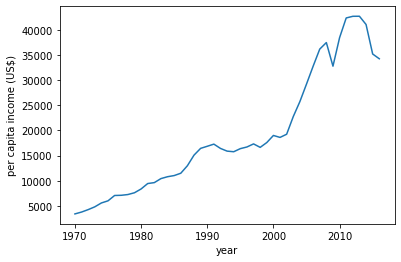

In [48]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.plot(data[["year"]],data[["per capita income (US$)"]])

In [49]:
from sklearn import linear_model

In [50]:
lr=linear_model.LinearRegression()

In [51]:
lr.fit(data[["year"]],data[["per capita income (US$)"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

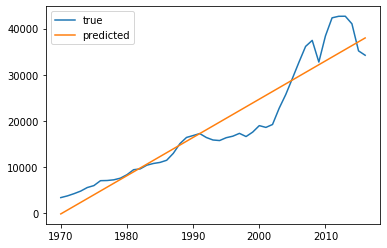

In [52]:
plt.plot(data[["year"]],data[["per capita income (US$)"]],label="true")
plt.plot(data[["year"]],lr.predict(data[["year"]]),label="predicted")
plt.legend()
plt.show()

In [59]:
lr.predict([[1990]])

array([[16434.74183774]])

In [98]:
def preprocess(data,n=3,var="year"):
    df=data.copy()
    for i in range(2,n+1):
        df["{}{}".format(var,i)]=df[var]**i
    return df

In [99]:
df_train=preprocess(data[["year"]],n=4,var="year")
df_train.head()

,year,year2,year3,year4
0,1970,3880900,7645373000,15061384810000
1,1971,3884841,7657021611,15091989595281
2,1972,3888784,7668682048,15122640998656
3,1973,3892729,7680354317,15153339067441
4,1974,3896676,7692038424,15184083848976


In [100]:
lr.fit(df_train,data[["per capita income (US$)"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

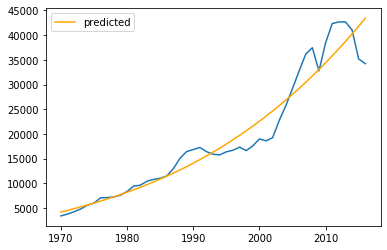

In [101]:
plt.plot(data["year"],data["per capita income (US$)"])
plt.plot(data["year"],lr.predict(df_train),color="orange",label="predicted")
plt.legend()

In [102]:
lr.predict([[1970,1980,1990,1978]])

array([[-2.16154367e+08]])

In [103]:
data.year,lr.predict(df_train)

(0     1970
 1     1971
 2     1972
 3     1973
 4     1974
 5     1975
 6     1976
 7     1977
 8     1978
 9     1979
 10    1980
 11    1981
 12    1982
 13    1983
 14    1984
 15    1985
 16    1986
 17    1987
 18    1988
 19    1989
 20    1990
 21    1991
 22    1992
 23    1993
 24    1994
 25    1995
 26    1996
 27    1997
 28    1998
 29    1999
 30    2000
 31    2001
 32    2002
 33    2003
 34    2004
 35    2005
 36    2006
 37    2007
 38    2008
 39    2009
 40    2010
 41    2011
 42    2012
 43    2013
 44    2014
 45    2015
 46    2016
 Name: year, dtype: int64, array([[ 4184.82806358],
        [ 4522.28488398],
        [ 4871.98019993],
        [ 5234.62984738],
        [ 5610.95073184],
        [ 6001.66082934],
        [ 6407.47918558],
        [ 6829.12591648],
        [ 7267.32220855],
        [ 7722.79031762],
        [ 8196.25357017],
        [ 8688.43636265],
        [ 9200.06416142],
        [ 9731.86350352],
        [10284.5619953 ],
        [10858.88831

# use of pickle from linearmodel (a)

In [108]:
import pickle

In [109]:
with open("model","rb") as f:
    mp=pickle.load(f)

In [110]:
mp.predict([[4000]])

array([723767.12328767])